Current font.family: ['Times New Roman']
Current font serif: ['Times New Roman']


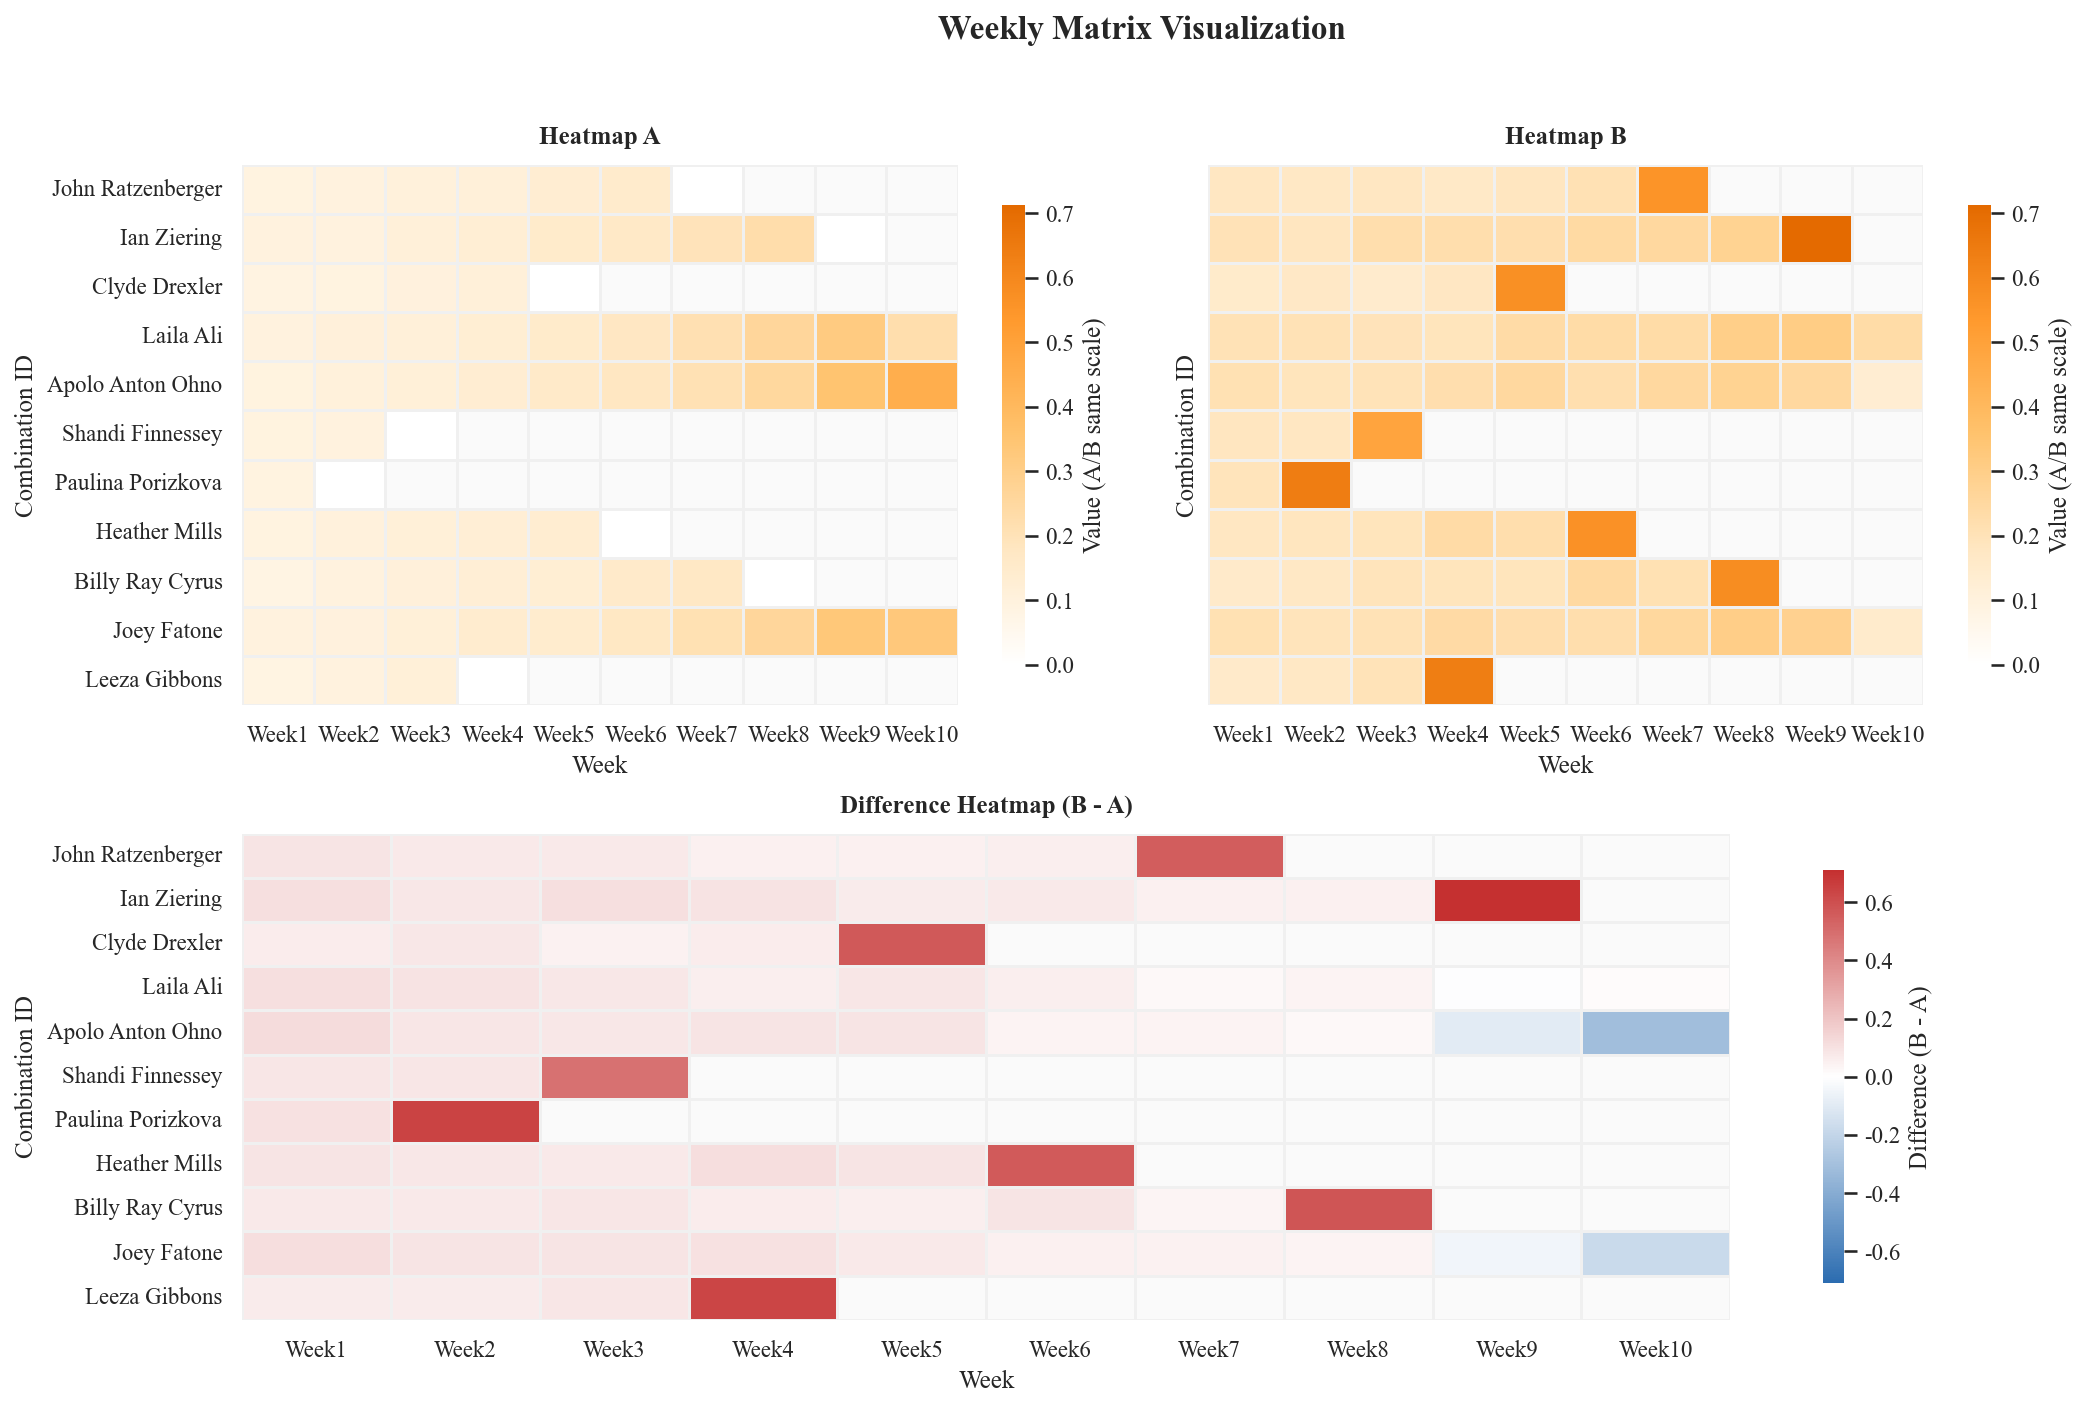

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap







import matplotlib as mpl





mpl.rcParams["font.family"] = "Times New Roman"

mpl.rcParams["font.serif"] = ["Times New Roman"]    

mpl.rcParams["mathtext.fontset"] = "stix"           

mpl.rcParams["axes.unicode_minus"] = False          



print("Current font.family:", mpl.rcParams["font.family"])

print("Current font serif:", mpl.rcParams["font.serif"])



EXCEL_PATH = "问题一子问题2.xlsx"   



raw = pd.read_excel(EXCEL_PATH, sheet_name=0, header=None)



def extract_tables_from_raw(raw_df, header_token="组合编号"):

    """在同一张 sheet 内，按出现 '组合编号' 的行作为表头，自动切出连续块。"""

    header_rows = raw_df.index[raw_df.iloc[:, 0].astype(str).eq(header_token)].tolist()

    tables = []



    for start in header_rows:

        

        end = start + 1

        while end < len(raw_df):

            first_cell = raw_df.iloc[end, 0]

            if pd.isna(first_cell):

                break

            if str(first_cell) == header_token:

                break

            end += 1



        block = raw_df.iloc[start:end, :].copy()



        

        block = block.dropna(axis=1, how="all")



        

        block.columns = block.iloc[0].astype(str).tolist()

        block = block.iloc[1:].copy()



        

        idx_col = block.columns[0]

        block[idx_col] = block[idx_col].astype(str)

        block = block.set_index(idx_col)



        

        for c in block.columns:

            block[c] = pd.to_numeric(block[c], errors="coerce").fillna(0.0)



        tables.append(block)



    return tables



tables = extract_tables_from_raw(raw)





A = tables[0]   

B = tables[2]  



weeks_cn = [f"第{i}周" for i in range(1, 11)]

weeks_en = [f"Week{i}" for i in range(1, 11)]





A = A[weeks_cn]

B = B[weeks_cn]



rename_map = dict(zip(weeks_cn, weeks_en))

A = A.rename(columns=rename_map)

B = B.rename(columns=rename_map)



sns.set_theme(

    style="white",

    font_scale=1.0,

    rc={

        "font.family": "Times New Roman",

        "font.serif": ["Times New Roman"],

        "mathtext.fontset": "stix",

        "axes.unicode_minus": False,

        "pdf.fonttype": 42,  

        "ps.fonttype": 42

    }

)





cmap = LinearSegmentedColormap.from_list(

    "white_to_orange",

    ["#FFFFFF", "#FFE7C2", "#FFC36E", "#FF9A2E", "#E46A00"]

)





vmin = 0.0

vmax = max(A.to_numpy().max(), B.to_numpy().max())





maskA = (A == 0)

maskB = (B == 0)



fig = plt.figure(figsize=(16, 10), dpi=150)

gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.9], hspace=0.25, wspace=0.08)



ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)

ax3 = fig.add_subplot(gs[1, :])



sns.heatmap(

    A,

    ax=ax1,

    cmap=cmap,

    vmin=vmin, vmax=vmax,

    mask=maskA,

    linewidths=0.6,

    linecolor="#F0F0F0",

    cbar=True,

    cbar_kws=dict(shrink=0.85, label="Value (A/B same scale)")

)

ax1.set_title("Heatmap A", pad=10, weight="bold")

ax1.set_xlabel("Week")

ax1.set_ylabel("Combination ID")

ax1.tick_params(axis="x", rotation=0)

ax1.set_facecolor("#FAFAFA")  



sns.heatmap(

    B,

    ax=ax2,

    cmap=cmap,

    vmin=vmin, vmax=vmax,

    mask=maskB,

    linewidths=0.6,

    linecolor="#F0F0F0",

    cbar=True,

    cbar_kws=dict(shrink=0.85, label="Value (A/B same scale)")

)

ax2.set_title("Heatmap B", pad=10, weight="bold")

ax2.set_xlabel("Week")

ax2.set_ylabel("Combination ID")

ax2.tick_params(axis="x", rotation=0)

ax2.tick_params(axis="y", left=False, labelleft=False)

ax2.set_facecolor("#FAFAFA")



D = B - A





div_cmap = LinearSegmentedColormap.from_list(

    "blue_white_red",

    ["#2B6CB0", "#FFFFFF", "#C53030"]

)

maskD = (D == 0)





absmax = np.nanmax(np.abs(D.to_numpy()))

sns.heatmap(

    D,

    ax=ax3,

    cmap=div_cmap,

    vmin=-absmax, vmax=absmax,

    mask=maskD,

    linewidths=0.6,

    linecolor="#F0F0F0",

    cbar=True,

    cbar_kws=dict(shrink=0.85, label="Difference (B - A)")

)

ax3.set_title("Difference Heatmap (B - A)", pad=10, weight="bold")

ax3.set_xlabel("Week")

ax3.set_ylabel("Combination ID")

ax3.tick_params(axis="x", rotation=0)

ax3.set_facecolor("#FAFAFA")





fig.suptitle("Weekly Matrix Visualization", y=0.98, fontsize=16, weight="bold")



plt.savefig("weekly_heatmaps_beautified.png", bbox_inches="tight", dpi=450)

plt.savefig("weekly_heatmaps_beautified.pdf", bbox_inches="tight")

plt.show()

